# Notebook para valoração do uso da flexibilidade de hydroeletricas através da análise do custo de soluções alternativas

Globalmente, a política de implementação de fontes renováveis tem se concentrado principalmente na expansão da capacidade instalada, enquanto questões operacionais, como a necessidade de flexibilidade para manter a estabilidade do sistema, bem como regulamentações e procedimentos de rede atualizados para aprimorar o controle do sistema de energia, foram frequentemente negligenciados. No entanto, atualmente, um número crescente de países está voltando sua atenção para as consequências dos altos níveis de participação de fontes de energia não convencionais no funcionamento adequado do sistema elétrico e nos mecanismos de integração dessas fontes à rede.

As usinas hidrelétricas são muito eficientes em fornecer serviços ancilares à rede elétrica, graças a sua flexibilidade. Especificamente, elas desempenham um papel crucial no controle de potência ativa e da frequência. Além disso, as usinas hidrelétricas com reservatório têm a capacidade de oferecer uma ampla gama de serviços energéticos, como geração de energia de base e de pico, bem como armazenamento de energia. Além disso, essas usinas podem desempenhar um papel importante na regulação de outras fontes de energia, com custos variáveis muito baixos.

Neste contexto de crescente uso de fontes de energia não despachável, cada vez mais as usinas hidrelétricas vão ser demandadas a fornecer serviços ancilares e de flexibilidade. É de fundamental importância a valoração destes serviços de maneira a incentivar o desenvolvimento de capacidade para os mesmos aumentando a eficiência do uso dos recursos hídricos. Desta maneira o presente trabalho visa contribuir para estimar o valor de tal serviço à sociedade através do cálculo do custo de soluções alternativas seguindo o conceito de BATNA (do inglês: Best Alternative To a Negotiated Agreement)  introduzido no método de negociação de Havard.

Este notebook foi feito visando a valoração do custo da flexibilidade energética de um país de consumo equivalente ao Brasil. Para isso, foram determinados dois cenárioas alternativos para suprir a flexibilidade requerida pela demanda brasileira. Imagina-se, primeiramente, um cenário com turbinas à gás, e um cenário com turbinas à gás em conjunto com baterias. Vale lembrar que para estas turbinas, foi verificado o Custo Capital e os Custos de Operação e Manutenção; e que estes são divididos em fixos e variáveis.

Com base nesses custos e com um uma estimativa do valor de MWH usados para suprir a flexibilidade vamos alcançar um o custo, em US$/MWH flexível, associado a prover a flexibilidade sem o uso de plantas hidroelétricas, e com base no método BATNA, alcançamos o valor da flexibilidade.

Para facilitar a utilização do especialista, o notebook está dividido em seções.

#Seção de caracterização do notebook

**Texto originado no artigo.**

    Equação do artigo

*Comentário sobre o código*

In [71]:
#Comentário no código
Codigo = str()
print("Output do programa")

Output do programa


# Seção 1 - Coleta de dados

*Nessa  parte será feita a instalação das biblioteca necessaria para o calculo da amortização onde é utilizado o método PRICE.*

In [72]:
# pip install amortization # Para essa biblioteca foi necessaria a instalação antes desta ser importada. # TODO Mudar para o anterior


*Nesta parte, seleciona-se entre as bibliotecas instaladas que serão utilizadas neste código para leitura de dados, calculos matemáticos, calculos de amortização e para analise estatística.*

In [73]:
# Biblioteca para analise de dados.
import pandas as pd

# Biblioteca Python para ler/gravar arquivos xlsx/xlsm/xltx/xltm do Excel 2010.
import openpyxl

# Biblioteca Python para lidar com arquivos e caminhos em seu sistema operacional.
from pathlib import Path

# Biblioteca que permite manipular grande quantidade de dados multidimensionais
import numpy as np

# Biblioteca que permite criação de gráficos
import matplotlib.pyplot as plt

# Biblioteca que amplia as funções matematicas disponiveis
import math as m

# Biblioteca que permite importar arquivos para o google colab # TODO Mudar para o anterior
# from google.colab import files

# Biblioteca que permite acesso a algumas variaveis do sistema
import sys

# Biblioteca para calcular amortização
from amortization.schedule import amortization_schedule

# importa variável aleatória de distribuição normal e contínua.
from scipy.stats import norm

# Biblioteca para análises estatísticas em Python.
import statistics


*Aqui são feitos uploads de arquivos excel da ONS com os dados da demanda horária no ano de 2022 (ano escolhido).*

In [74]:
# uploaded = files.upload() # Passo necessario por ser utilizado o google colab # TODO Mudar para o anterior

*O trecho de código a seguir apresenta a definição da variável que lerá o arquivo excel apresentado previamente.*

In [75]:
df = pd.read_excel('CURVA_CARGA_2022.xlsx'); #Nome do arquivo tem que ser mudado se for usar dados de outro ano
df.dropna(inplace = True)
# print(np.sum(df.iloc[:,3]))

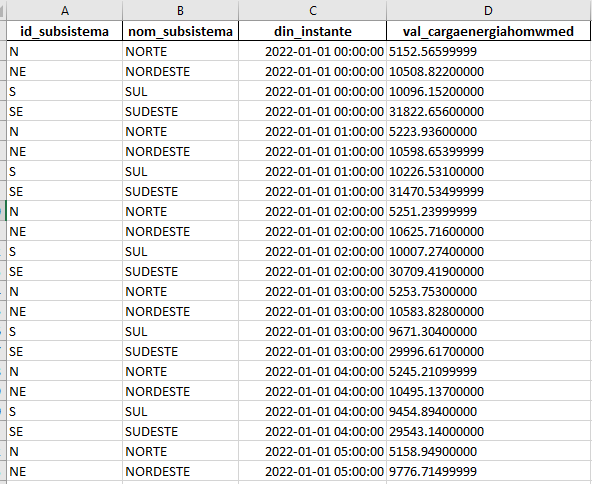

*Estrutura da tabela gerada pela ONS*

*Aqui os dados dos consumos de energia horário de cada região do Brasil (Norte - N; Nordeste - NE; Sul - S; Sudeste - SE) são adquiridos.*

In [76]:
flag = 1

energia_horaria = [0] * int(len(df))
energia_horaria_N = [0] * int(len(df))
energia_horaria_NE = [0] * int(len(df))
energia_horaria_S = [0] * int(len(df))
energia_horaria_SE = [0] * int(len(df))
tempo = [0] * int(len(df))

# print(df.loc[1][3])

# Organização da informação colhida no arquivo Excel.
for i in range(0, len(df) - 1):
    if df.iloc[i, 0] == "N":
        energia_horaria_N[i] = df.iloc[i, 3]
        tempo[i] = df.iloc[i, 2]
    if df.iloc[i, 0] == "NE":
        energia_horaria_NE[i] = df.iloc[i, 3]
    if df.iloc[i, 0] == "S":
        energia_horaria_S[i] = df.iloc[i, 3]
    if df.iloc[i, 0] == "SE":
        energia_horaria_SE[i] = df.iloc[i, 3]

# print(df.loc[len(df)-1][0] == "SE")
# print(df.size)
# print(df.loc[1][3])


*Primeiro gráfico da demanda horária de energia no Brasil.*

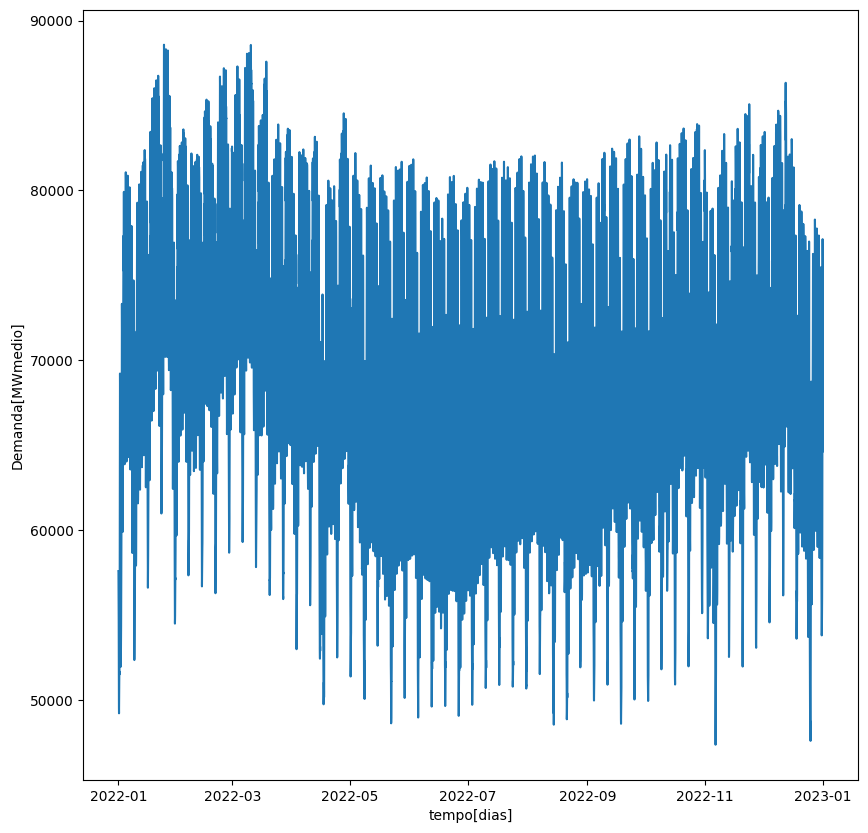

Figura 1 - Demanda sem media movel[MWmedio]


In [77]:
j = 0
k = 0
A = []


# Define o vetor de tempo para o "eixo x" do gráfico.
for i in tempo:
    if (j % 4) == 0:
        A.append(i)
        k += 1
        j = 0
    j += 1
    
tempo_TEMP = pd.Series(A)


# Coleta os dados dos consumos de energia da região Norte.
j = 0
k = 0

novo_energia_horaria_N = []

for i in energia_horaria_N:
    if (j % 4) == 0:
        novo_energia_horaria_N.append(i)
        k += 1
        j = 0
    j += 1
energia_horaria_N_TEMP = pd.Series(novo_energia_horaria_N)


# Coleta os dados dos consumos de energia da região Nordeste.
j = 3
novo_energia_horaria_NE = []
for i in energia_horaria_NE:
    if (j % 4) == 0:
        novo_energia_horaria_NE.append(i)
        j = 0
    j += 1
energia_horaria_NE_TEMP = pd.Series(novo_energia_horaria_NE)


# Coleta os dados dos consumos de energia da região Sul.
j = 2
novo_energia_horaria_S = []
for i in energia_horaria_S:
    if (j % 4) == 0:
        novo_energia_horaria_S.append(i)
        j = 0
    j += 1
energia_horaria_S_TEMP = pd.Series(novo_energia_horaria_S)


# Coleta os dados dos consumos de energia da região Sudeste.
j = 1
novo_energia_horaria_SE = []
for i in energia_horaria_SE:
    if (j % 4) == 0:
        novo_energia_horaria_SE.append(i)
        j = 0
    j += 1
energia_horaria_SE_TEMP = pd.Series(novo_energia_horaria_SE)


# Soma todas as energias e traça a média do consumo de energia anual.
if flag == 1:
    flag = 0
    energia_horaria_N = energia_horaria_N_TEMP
    energia_horaria_NE = energia_horaria_NE_TEMP
    energia_horaria_S = energia_horaria_S_TEMP
    energia_horaria_SE = energia_horaria_SE_TEMP
    energia_horaria = energia_horaria_N+energia_horaria_NE + \
        energia_horaria_S+energia_horaria_SE
    tempo = tempo_TEMP
    energia_horaria[len(energia_horaria)-1] = np.mean(energia_horaria)
    
# verificado que funcionou
# print(len(energia_horaria_N_TEMP))
# print(len(energia_horaria_NE_TEMP))
# print(len(energia_horaria_S_TEMP))
# print(len(energia_horaria_SE_TEMP))
# print(len(tempo_TEMP))
# plt.plot(tempo_TEMP,energia_horaria_N_TEMP)
# plt.plot(tempo_TEMP,energia_horaria_NE_TEMP)
# plt.plot(tempo_TEMP,energia_horaria_S_TEMP)
# plt.plot(tempo_TEMP,energia_horaria_SE_TEMP)


# Figura do gráfico "Consumo de energia x hora" em 1 ano.

plt.figure(figsize=(10, 10))
plt.plot(tempo_TEMP, energia_horaria)
plt.xlabel("tempo[dias]")
plt.ylabel("Demanda[MWmedio]")
plt.show()


print("Figura 1 - Demanda sem media movel[MWmedio]")


In [78]:
energia_horaria = energia_horaria[0: (len(energia_horaria) - 1)]

print("Média anual de consumo:", np.mean(energia_horaria), "MW")


Média anual de consumo: 68785.90514064436 MW


In [79]:
import plotly.graph_objects as go

# Article SNPTEE: Year demand moving average in 7 days
moving_seven_days = []
number_days = 7 * 24  # seven days, 24 hours each
i = 0
while i < len(energia_horaria) - number_days + 1:

    # Store elements from i to i+window_size
    # in list to get the current window
    window = energia_horaria[i: i + number_days]

    # Calculate the average of current window
    window_average = sum(window) / number_days

    # Store the average of current
    # window in moving average list
    moving_seven_days.append(window_average)

    # Shift window to right by one position
    i += 1

hours_in_year = list(range(365 * 24))
moving_average_hours = list(range(365 * 24 - number_days))

fig = go.Figure()
fig.add_trace(go.Scatter(x=hours_in_year, y=energia_horaria[:365 * 24], mode='lines', name='Demanda Horária'))
fig.add_trace(go.Scatter(x=moving_average_hours, y=moving_seven_days[:365 * 24 - number_days], mode='lines', name='Média Móvel de 7 Dias'))

fig.update_layout(
    title="Variação da Demanda Energética em um Ano e sua Média Móvel de 7 Dias",
    xaxis_title="Tempo [horas no ano]",
    yaxis_title="Demanda [MW médio]",
    legend_title="Legenda"
)

fig.show()


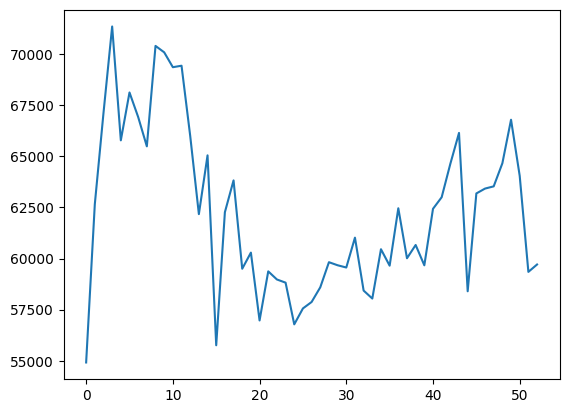

In [80]:
Year_amplitude = []
for i in range(0, (len(energia_horaria)), 168):
    week = []

    for a in range(7):
        week.append(energia_horaria[a + i])

    Year_amplitude.append(np.mean(week))


plt.plot(Year_amplitude)


# Seção 2 - Caso 1

 **O primeiro caso teve como foco encontrar a diferença entre o consumo máximo e a média de consumo anual. Assim, foi necessário achar o valor da potência instalada mínima para garantir o abastecimento de energia a todo momento, ou seja, o MW flexível.**

**Para isso, seguem as equações abaixo apresentando os cálculos realizados:**

---

    Consumo máximo = maior valor de consumo alcançado pela rede.
    Média de consumo = média dos valores de consumo horário no ano escolhido previamente.
    MW flexível = valor de potência instalada não utilizada durante a maior parte do tempo. Pode ser definido como o valor máximo menos o valor mínimo de energia consumida.

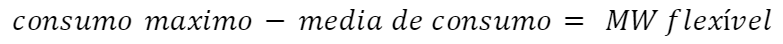


*Nesta parte calcula-se a média de consumo energético em um ano, verifica-se também o consumo máximo e o mínimo de consumo de energia no ano (considerando o intervalo de 1 hora).*

In [81]:
# Calculo 1
media_ano = np.average(energia_horaria)  # media do ano, W
max_ano = (np.max(energia_horaria))  # máximo do ano, MW
min_ano = (np.min(energia_horaria))  # mínimo do ano, MW
energia_necessaria = max_ano-media_ano
print("media do ano:", media_ano, "MW.")
print("maximo do ano:", max_ano, "MW.")
print("mínimo do ano:", min_ano, "MW.")
print(
    f"Quantos MW instalados estão parados em média(MW flexivel):{energia_necessaria} MW.")
comparar_caso1 = energia_necessaria


media do ano: 68785.90514064436 MW.
maximo do ano: 88576.12999999 MW.
mínimo do ano: 47357.94599999 MW.
Quantos MW instalados estão parados em média(MW flexivel):19790.22485934563 MW.


*Baseado em dados fornecidos por artigos, foram definidos alguns valores de geração de energia em cada turbina termelétrica (CCGT e LFGT com 450; AeroGT com 53; SteamGT com 300) em MW. A partir dessas constantes, foi calculado o número de turbinas necessárias e quantas ficariam paradas por pelo menos um instante de tempo. Por fim, é calulado o valor da energia em $/MW.*

**Com base nesse valor e com o custo de capital associado a termelétricas,  é possível estimar o custo de capital associado à construção das termelétricas necessárias para atender a diferença entre o pico de consumo e o seu valor médio.**   

    Custo = custo por MW associado a construção de uma termoelétrica.
    MW flexível = valor médio de potência instalada não sendo utilizada.
    Custo capital = custo associado à construção da potência instalada necessária para suprir a flexibilidade.
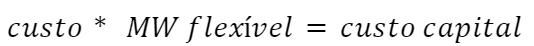

In [82]:
# Calculo 2

# Para a CCGT
potencia_termo_CCGT = 450  # MW
# total necessario de Usinas CCGT
termoeletricas_total_CCGT = np.ceil(max_ano / potencia_termo_CCGT)
# total de Usinas CCGT paradas
n_paradas_CCGT = np.ceil(energia_necessaria / potencia_termo_CCGT)
valor_Instalacao_CCGT = (n_paradas_CCGT * 815 * 1000 *
                         potencia_termo_CCGT)  # o valor é $/KW

# Para a AeroGT
potencia_termo_Aero = 53  # MW
# IC = 123 # $/h, visto em Exergetic and exergo-economic analyses of an aero-derivative gas turbine engine - Onder Turan, Hakan Aydin
# MWh_reais = 637 # MWh in reais
# MWh_dol = MWh_reais/5
# Investment_Cost = IC*3600/MWh_dol
# termoeletricas_total_Aero=np.ceil(max_ano/potencia_termo_Aero) # total necessario de Usinas AeroGT
# n_paradas_Aero=np.ceil(energia_necessaria/potencia_termo_Aero) # total de Usinas AeroGT paradas
# valor_Instalacao_Aero = (n_paradas_Aero*Investment_Cost*potencia_termo_Aero) # o valor é $/MW

# Para a SteamGT
potencia_steam = 300  # MW # TODO mudar de volta
# IC = 123 # $/h, visto em Exergetic and exergo-economic analyses of an aero-derivative gas turbine engine - Onder Turan, Hakan Aydin
# MWh_reais = 637 # MWh in reais
# MWh_dol = MWh_reais/5
# Investment_Cost = IC*3600/MWh_dol
# termoeletricas_total_steam=np.ceil(max_ano/potencia_steam) # total necessario de Usinas Steam GT
# n_paradas_steam=np.ceil(energia_necessaria/potencia_steam) # total de Usinas Steam GT paradas
# valor_Instalacao_steam = (n_paradas_steam*Investment_Cost*potencia_steam) # o valor é $/MW

print("Numero de CCGT paradas: ", n_paradas_CCGT,
      " \nResultando em um custo de bi$: ", ((valor_Instalacao_CCGT / 1000) / 1000) / 1000)
# print("Numero de Aero paradas: ",n_paradas_Aero, " \nResultando em um custo de bi$: ", ((valor_Instalacao_Aero/1000)/1000)/1000)
# print("Numero de Steam paradas: ",n_paradas_steam, " \nResultando em um custo de bi$: ", ((valor_Instalacao_steam/1000)/1000)/1000)


Numero de CCGT paradas:  44.0  
Resultando em um custo de bi$:  16.137


Nesta etapa, é calculado o valor mensal de uma turbina termelétrica parada considerando a sua potência também (tem que mudar os valores para CADA TURBINA QUE ESTÁ SENDO ANALISADA(em curso)).

**Os dois cenários possuem maquinários com tempo de vida útil diferentes, para fazer a comparação dos investimentos se considerou o custo total dos dois cenários e aplicou o custo do capital necessário a tabela PRICE para alcançar o custo mensal equivalente [6].**

    custo capital  *  taxa de juros/ ( 1 - (1 + taxa juros)^(-num parcelas))

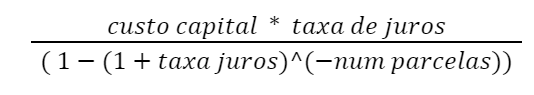

**Para que nos dois casos, o custo de aquisição dos equipamentos estejam no mesmo patamar, tornando uma comparação mais justa e realista.**


In [83]:
# Calculo 3
custo_termo_CCGT = 12000.00  # US$/MW por ano
custo_anual_CCGT_paradas = n_paradas_CCGT * \
    potencia_termo_CCGT * custo_termo_CCGT
print("O custo anual de uma CCGT termelétrica parada pode é: $",
      custo_anual_CCGT_paradas/12)

# Colocar os custos da AeroGT paradas
custo_Aero_paradas = 12000.00  # US$/MW por ano
# custo_anual_Aero = n_paradas_Aero * potencia_termo_Aero * custo_Aero_paradas
# print("O custo anual de uma AeroGT termelétrica parada pode é: $", custo_anual_CCGT_paradas/12)

# Colocar os custos da SteamGT paradas
custo_termo_steam = 12000.00  # US$/MW por ano
# custo_anual_steam_paradas = n_paradas_steam * potencia_steam * custo_termo_steam
# print("O custo anual de uma SteamGT termelétrica parada pode é: $", custo_anual_steam_paradas/12)


O custo anual de uma CCGT termelétrica parada pode é: $ 19800000.0


*Pode-se realizar também o custo de operação de uma turbina termelétrica.*

In [84]:
custo_termo_instalada = 815000.00  # US$/MW
custo_instalacao_termo_paradas = n_paradas_CCGT * \
    potencia_termo_CCGT * custo_termo_instalada
print("custo total de instalação das termoeleticas paradas",
      custo_instalacao_termo_paradas, "US$")


custo total de instalação das termoeleticas paradas 16137000000.0 US$


*Nesta fase, procede-se ao cálculo da quota mensal de instalação por meio da aplicação do cálculo de amortização.*

In [85]:
# Calculo da amortizacao 4
# https://pypi.org/project/amortization/
# for number, amount, interest, principal, balance in amortization_schedule(150000, 0.1, 36):
# print(number, amount, interest, principal, balance)

# 20 anos com o valor de instalação com juros de 5% ao ano
for number, amount, interest, principal, balance in amortization_schedule(custo_instalacao_termo_paradas, 0.05, 12*20):
    a = 2

parcela_mensal_instalacao_c1 = amount
print("custo capital por mês", parcela_mensal_instalacao_c1, "US$")


custo capital por mês 106497056.45999493 US$


**Os dois cenários possuem maquinários com tempo de vida útil diferentes, para fazer a comparação dos investimentos se considerou o custo total dos dois cenários e aplicou o custo do capital necessário a tabela PRICE para alcançar o custo mensal equivalente.**
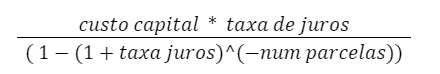

**Para que nos dois casos, o custo de aquisição dos equipamentos estejam no mesmo patamar, tornando uma comparação mais justa e realista.**

*Por fim, calcula-se o custo mensal total por meio da adição do custo de instalação ao custo mensal de manutenção, enquanto o custo de flexibilidade foi determinado ao dividirmos o custo mensal pelo valor médio mensal de energia.*

In [86]:
# Calculo final da parcela mensal total 4
print("Custo de manutenção (em USD): ", custo_anual_CCGT_paradas / 12)
custo_total_caso_1 = parcela_mensal_instalacao_c1 + custo_anual_CCGT_paradas / 12
print("Custo total mensal caso 1:", custo_total_caso_1, "US$")
preco_dollarMW_c1 = custo_total_caso_1 / \
    (media_ano * 30 * 24)  # custo mensal por energia mensal
print("Custo flexibilidade caso 1:", preco_dollarMW_c1, "US$/MW")


Custo de manutenção (em USD):  19800000.0
Custo total mensal caso 1: 126297056.45999493 US$
Custo flexibilidade caso 1: 2.550123867062578 US$/MW


# Seção 3 - Caso 2

## Caso 2

Nesta fase, efetuamos o cálculo da média anual de consumo de energia e o gasto diário médio durante o período de maior demanda energética do ano.

In [87]:
# Calculo 1
media_ano = np.average(energia_horaria)  # media do ano
# index na matriz do maior valor do ano
ind_max_ano = (np.argmax(energia_horaria))
# print((tempo_TEMP[ind_max_ano-15:ind_max_ano+9]))
# gasto médio do dia com maior uso de energia
media_max_dia = np.average(energia_horaria[ind_max_ano - 15: ind_max_ano + 9])
print(f"Média anual de consumo de energia: {media_ano:.2f}")
print(f"Média do dia com maior gasto energético: {media_max_dia:.2f}")


Média anual de consumo de energia: 68785.91
Média do dia com maior gasto energético: 79530.16


Agora, realizamos o cálculo da energia requerida para esta situação e a armazenamos para posterior comparação com outros cenários.

In [88]:
# cálculo da energia necessaria atrávez da diferença da media do dia com maior uso e a media anual de uso
energia_necessaria = media_max_dia-media_ano
print(
    f"Resultado da diferença do maior pico de energia e a média anual: {(max_ano-media_ano):.2f} MW")
print(
    f"Resultado da diferença da media diária de maior uso de energia e a média anual: {energia_necessaria:.2f} MW")
# armazenamento da energia necessária no caso 2
comparar_caso2 = energia_necessaria
print(
    f"Quantos MW instalados estão parados em média:{energia_necessaria:.2f} MW")


Resultado da diferença do maior pico de energia e a média anual: 19790.22 MW
Resultado da diferença da media diária de maior uso de energia e a média anual: 10744.25 MW
Quantos MW instalados estão parados em média:10744.25 MW


Neste momento, por meio da capacidade das usinas termoelétricas, determinamos a quantidade de usinas inativas e o custo associado a instalação das que se encontram nesse estado.

In [89]:
# Calculo 2
potencia_termo = 450  # MW
# total necessario de Usinas
termoeletricas_total = np.ceil(max_ano/potencia_termo)
# total de Usinas paradas
n_paradas = np.ceil(energia_necessaria/potencia_termo)
valor_Instalacao = (n_paradas * 815 * 1000 * potencia_termo)  # o valor é $/KW
print(f"Número de Usinas que não estão sendo utilizadas: {int(n_paradas)}")
print(
    f"Valor de instalação das usinas não utilizadas: {valor_Instalacao:.2f}$/KW")


Número de Usinas que não estão sendo utilizadas: 24
Valor de instalação das usinas não utilizadas: 8802000000.00$/KW


Neste estágio, identificamos o custo mensal das usinas termoelétricas que não estão em operação, com base no preço por megawatt-hora anual.


In [90]:
# Calculo 3
custo_termo_paradas = 12000.00  # US$/MW por ano
custo_anual_termo_paradas = n_paradas * potencia_termo * custo_termo_paradas
print(
    f"Custo mensal das termoelétricas que ficam paradas: {(custo_anual_termo_paradas/12):.2f}$/KW")


Custo mensal das termoelétricas que ficam paradas: 10800000.00$/KW


In [91]:
custo_termo_instalada = 815000.00  # US$/MW
custo_instalacao_termo_paradas = n_paradas * \
    potencia_termo * custo_termo_instalada
print(
    f"Custo mensal da instalação das usinas não funcionais: {(custo_instalacao_termo_paradas/12):.2f}$/KW")


Custo mensal da instalação das usinas não funcionais: 733500000.00$/KW


In [92]:
# Calculo do custo mensal da instalação de termos
custo_para_amortizar = custo_instalacao_termo_paradas
# print("Valor do base: ",custo_para_amortizar)
# 20 anos com o valor de instalação com juros de 5% ao ano
for number, amount, interest, principal, balance in amortization_schedule(custo_para_amortizar, 0.05, 12 * 20):
    a = 2
parcela_mensal_TD_c2 = amount
print(
    f"Valor mensal de amortização das usinas ociosas, com uma taxa de juros de 5% ao ano, ao longo de um período de 20 anos: {parcela_mensal_TD_c2:.2f}$/KW")


Valor mensal de amortização das usinas ociosas, com uma taxa de juros de 5% ao ano, ao longo de um período de 20 anos: 58089302.46$/KW


##Caso 2 - Armazenamento

In [93]:
def armazenamento(ampl_indice_fnc):
    amplitude_dia_fnc = []
    for a in range(24):
        ai = ampl_indice_fnc + a
        if ai < len(energia_horaria):
            amplitude_dia_fnc.append(energia_horaria[ai])
    top_integral_fnc = 0
    sub_integral_fnc = 0
    media_dia_ampl_fnc = np.average(
        energia_horaria[ampl_indice_fnc:(ampl_indice_fnc + 24)])
    throughput_fnc = np.amax(amplitude_dia_fnc) - media_dia_ampl_fnc

    for i in amplitude_dia_fnc:
        if i >= media_dia_ampl_fnc:
            top_integral_fnc += i - media_dia_ampl_fnc
        else:
            sub_integral_fnc += media_dia_ampl_fnc - i
    return (top_integral_fnc, sub_integral_fnc, throughput_fnc, media_dia_ampl_fnc)


In [94]:
max_storage = []
throughput_days = []
media_dias_lista = []
for i in range(0, len(energia_horaria), 24):
    aux = armazenamento(i)
    max_storage.append(aux[0])
    throughput_days.append(aux[2])
    media_dias_lista.append(aux[3])

max_throughput = np.amax(throughput_days)
max_storage_value = np.amax(max_storage)
max_termo_bateria = np.max(media_dias_lista)
# o máximo da integral da parte acima da média
print(f"Acima da curva {max_storage_value} MWH")
# o máximo da diferença da media para o
print(f"Maior diferença média do máximo diario:{max_throughput} MW")
print(max_termo_bateria)


Acima da curva 86187.99949953501 MWH
Maior diferença média do máximo diario:16194.493000012502 MW
80438.1517499875


In [95]:
# uploaded_2 = files.upload() # TODO Mudar para o anterior

In [96]:
df_2 = pd.read_excel("custo baterias.xlsx")

In [97]:
baterias = []
# baterias.append(("tipo", "KiloWatt" , "KiloWatt-Hora"))
for i in range(2, 11):
    print(df_2.loc[i, 1])
    baterias.append((df_2.loc[i, 1], df_2.loc[i, 2],
                    df_2.loc[i, 3], df_2.loc[i, 4], df_2.loc[i, 7]))


Bateria: Chumbo-Ácido
Bateria: Lítio-Íon
Bateria: Fluxo de oxidação
Bateria: Sódio-Enxofre
Bateria: Sódio-Metal
Bateria: Zinco-Catodo Híbrido
Torre de Água
Flywheel
Ultracapacitor


In [98]:
baterias_calculado = []
for i in range(0, len(baterias)):
    # energia_armazenada custo conversao ano
    armazenamento = (max_storage_value*baterias[i][2] * 1000)
    # energia_instantanea custo conversao ano
    potencia_fornecida_max = (max_throughput*baterias[i][1] * 1000)
    # potencia_fornecida_max=(max_throughput*baterias[i][1]*1000*20)/(baterias[i][3] * baterias[i][4]) # energia_instantanea custo conversao ano
    # print("\t",baterias[i][0],"\t",potencia_fornecida_max,"\t", armazenamento)
    if armazenamento > potencia_fornecida_max:
        temp = armazenamento
    else:
        temp = potencia_fornecida_max
    baterias_calculado.append([baterias[i][0], temp])

# for i in range(1,11):
temp = baterias_calculado[0][1]
for i in (baterias_calculado):
    print(i)
indice = 0
for i in range(0, len(baterias)):
    if temp > baterias_calculado[i][1]:
        temp = baterias_calculado[i][1]
        indice = i
melhor_armazenamento = []
melhor_armazenamento.append(baterias_calculado[indice][1])
print(" ")
print(baterias_calculado[indice][0], melhor_armazenamento)


['Bateria: Chumbo-Ácido', 47317211725.24472]
['Bateria: Lítio-Íon', 40422171765.28192]
['Bateria: Fluxo de oxidação', 73949303570.60104]
['Bateria: Sódio-Enxofre', 78172515546.07825]
['Bateria: Sódio-Metal', 79982463535.5685]
['Bateria: Zinco-Catodo Híbrido', 47489587724.24379]
['Torre de Água', 42721072534.03298]
['Flywheel', 27028608817.020866]
['Ultracapacitor', 15060878490.011627]
 
Ultracapacitor [15060878490.011627]


In [99]:
def price(valor, taxa, parcelas):
    resultado = ((valor * taxa)/((1 - (1 + taxa)**(parcelas * (-1)))))
    return resultado


In [100]:
print(custo_para_amortizar)
print(price(custo_para_amortizar, 0.05 / 12, 240))


8802000000.0
58089304.1658503


In [101]:
# Calculo da amortizacao 4
# https://pypi.org/project/amortization/
# for number, amount, interest, principal, balance in amortization_schedule(150000, 0.1, 36):
# print(number, amount, interest, principal, balance)
custo_para_amortizar = melhor_armazenamento[0]

print("Valor do base: ", custo_para_amortizar)
# 16 anos com o valor de instalação com juros de 5% ao ano
for number, amount, interest, principal, balance in amortization_schedule(custo_para_amortizar, 0.05, 12 * 16):
    a = 2
print("Valor do Ultracapacitor mensal:", amount)
parcela_mensal_instalacao_c2 = amount + parcela_mensal_TD_c2
print("Valor da biblioteca: ", parcela_mensal_instalacao_c2)
# print(parcela_mensal_instalacao_c2/parcela_mensal_instalacao)
print("Valor do base: ", custo_para_amortizar)
print("Valor do Caio: ", price(custo_para_amortizar, 0.05 / 12, 16 * 12))


Valor do base:  15060878490.011627
Valor do Ultracapacitor mensal: 114113415.22162215
Valor da biblioteca:  172202717.6816201
Valor do base:  15060878490.011627
Valor do Caio:  114113414.24348627


## Caso 2 - resultado

In [102]:
# Calculo final da parcela mensal total 4
custo_total_caso_2 = parcela_mensal_instalacao_c2 + custo_anual_termo_paradas / 12
print("Custo total mensal caso 2:", custo_total_caso_2, "US$")
preco_dollarMW_c2 = custo_total_caso_2 / \
    (media_ano * 30 * 24)  # custo mensal por energia mensal
print("Custo flexibilidade caso 2:", preco_dollarMW_c2, "US$/MW")


Custo total mensal caso 2: 183002717.6816201 US$
Custo flexibilidade caso 2: 3.695094812008043 US$/MW


# Seção 4 - resultados

In [103]:
print("Custo flexibilidade caso 1:", preco_dollarMW_c1)
print("Custo flexibilidade caso 2:", preco_dollarMW_c2)
print("Percentil flexbilizado:", comparar_caso1)
print("Percentil flexbilizado:", comparar_caso2)


Custo flexibilidade caso 1: 2.550123867062578
Custo flexibilidade caso 2: 3.695094812008043
Percentil flexbilizado: 19790.22485934563
Percentil flexbilizado: 10744.25077601272


# Seção 5 - Cycling costs


## subseção - quantidade de ciclos

In [104]:
# uploaded = files.upload() # TODO Mudar para o anterior

In [105]:
df2 = pd.read_excel('costs_cycling.xlsx')


365
Amplitude Média no ano =  23330.63100001


<function matplotlib.pyplot.show(close=None, block=None)>

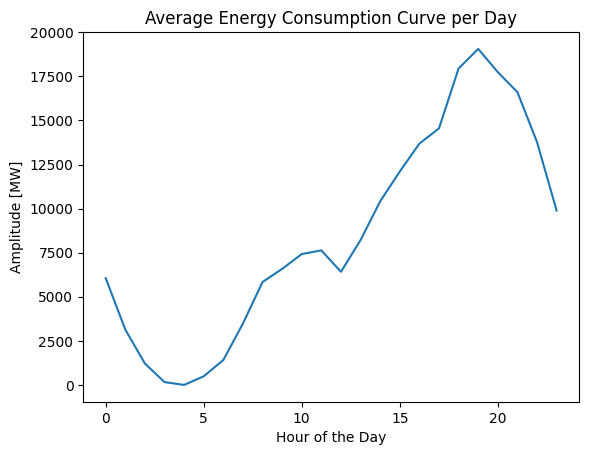

In [106]:
dia_medio = []
for i in range(25):
    dia_medio.append(0)

for i in range(25):
    dia_medio[i] = 0

for i in range(0, len(energia_horaria), 24):
    dia = []
    dia_teste = [[]]
    amplitude_dia = []
    result = 0
    horas = 0

    for a in range(24):
        if a + i < len(energia_horaria):  # Tive que mudar para rodar # TODO mudar de volta
            dia.append(energia_horaria[a + i])

    min_dia = np.amin(dia)
    max_dia = np.amax(dia)
    amplitude_dia.append(max_dia - min_dia)
    for i in range(len(dia)):
        dia_medio[i] += dia[i] - min_dia
    dia_medio[-1] += 1
print(dia_medio[-1])
min_aux = (np.amin(dia_medio[0:24]) / dia_medio[-1])
amplitude_media = np.average(amplitude_dia)
print("Amplitude Média no ano = ", amplitude_media)


for i in range(24):
    # dia_medio[i]=(dia_medio[i]/dia_medio[-1])-min_aux+np.average(energia_horaria)
    dia_medio[i] = (dia_medio[i] / dia_medio[-1]) - min_aux
plt.plot(range(24), dia_medio[0:24])
plt.title("Average Energy Consumption Curve per Day")
plt.ylabel("Amplitude [MW]")
plt.xlabel("Hour of the Day")
plt.show


In [107]:
MWH_flexivel = np.sum(dia_medio[0:24])
print(MWH_flexivel)


203841.32290637805


Text(0.5, 0, 'Hour of the Day')

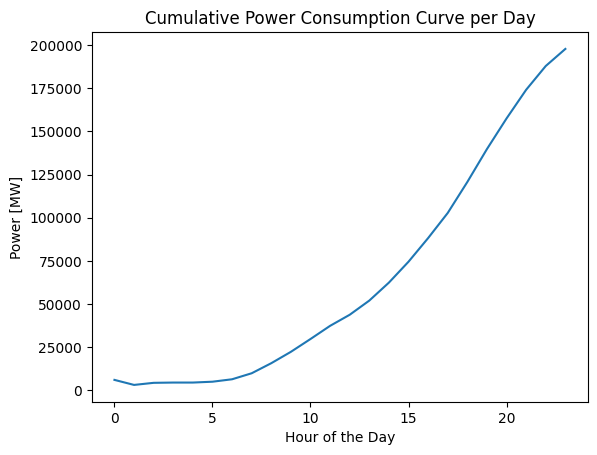

In [108]:
for i in range(24):
    if i > 1:
        dia_medio[i] += dia_medio[i - 1]

plt.plot(range(24), dia_medio[0:24])
plt.title("Cumulative Power Consumption Curve per Day")
plt.ylabel("Power [MW]")
plt.xlabel("Hour of the Day")


In [109]:
def cycle_nr(index):
    dia = []
    result = 0
    for a in range(24):
        # Tive que mudar para rodar # TODO mudar de volta
        if a + index < len(energia_horaria):
            dia.append(energia_horaria[a + index])
    max_dia = np.amax(dia)
    min_dia = np.amin(dia)
    ampli_dia = np.ceil(max_dia - min_dia)
    nr_flexiveis = np.ceil(ampli_dia / potencia_termo)
    for i in range(len(dia) - 1):
        aux = (np.ceil((dia[i+1] - min_dia) / potencia_termo) -
               np.ceil((dia[i] - min_dia) / potencia_termo))
        if aux > 0:
            result += aux
    return (ampli_dia, result, nr_flexiveis)


In [110]:
ciclos = []
nr_termoflexiveis = int()
amplitudes = []
for i in range(0, len(energia_horaria), 24):
    aux = cycle_nr(i)
    ciclos.append(aux[1])
    nr_termoflexiveis += (aux[-1])
    amplitudes.append(aux[0])
nr_termoflexiveis = np.ceil(nr_termoflexiveis / 365)
print(np.average(ciclos))


51.605479452054794


In [111]:
print("Numero médio de termoeletricas flexiveis",nr_termoflexiveis)
print(amplitudes)
print(ciclos)

Numero médio de termoeletricas flexiveis 47.0
[20007.0, 21366.0, 20025.0, 17193.0, 16831.0, 15882.0, 14340.0, 16052.0, 18865.0, 21368.0, 18783.0, 18717.0, 17946.0, 17971.0, 16828.0, 19597.0, 20516.0, 18983.0, 19012.0, 18169.0, 17360.0, 16527.0, 18577.0, 20585.0, 18113.0, 18042.0, 16127.0, 12827.0, 14501.0, 19037.0, 22038.0, 18602.0, 17266.0, 17678.0, 16160.0, 16284.0, 19726.0, 18925.0, 16756.0, 18200.0, 18438.0, 16395.0, 16281.0, 20244.0, 20612.0, 17909.0, 17953.0, 16725.0, 15500.0, 17383.0, 20663.0, 20666.0, 19982.0, 18042.0, 19447.0, 18002.0, 17057.0, 20258.0, 16659.0, 15361.0, 17636.0, 17730.0, 16481.0, 16921.0, 18929.0, 21570.0, 18658.0, 17938.0, 18699.0, 16339.0, 15288.0, 18668.0, 20551.0, 18544.0, 18873.0, 20494.0, 19372.0, 14843.0, 18641.0, 20852.0, 20593.0, 20254.0, 19949.0, 18148.0, 17165.0, 19611.0, 20717.0, 19280.0, 18443.0, 16973.0, 17093.0, 17581.0, 21281.0, 21998.0, 18249.0, 18688.0, 18569.0, 17545.0, 17547.0, 19609.0, 20509.0, 19147.0, 18371.0, 14744.0, 18651.0, 19980.0,

In [112]:
print(np.amin(ciclos))
print(np.amax(ciclos))

35.0
65.0


In [113]:
potencia_termo_menores = 250  # Tive que mudar para rodar # TODO mudar de volta


def cycle_nr_menores(index):
    dia = []
    result = 0
    for a in range(24):
        # Tive que mudar para rodar # TODO mudar de volta
        if a + index < len(energia_horaria):
            dia.append(energia_horaria[a + index])
    max_dia = np.amax(dia)
    min_dia = np.amin(dia)
    ampli_dia = np.ceil(max_dia - min_dia)
    nr_flexiveis = np.ceil(ampli_dia / potencia_termo_menores)
    for i in range(len(dia) - 1):
        aux = (np.ceil((dia[i + 1] - min_dia) / potencia_termo_menores) -
               np.ceil((dia[i] - min_dia) / potencia_termo_menores))
        if aux > 0:
            result += aux
    return (ampli_dia, result, nr_flexiveis)


In [114]:
ciclos_menores = []
nr_termoflexiveis_menores = int()
amplitudes_menores = []
for i in range(0, len(energia_horaria), 24):
    aux = cycle_nr_menores(i)
    ciclos_menores.append(aux[1])
    nr_termoflexiveis_menores += (aux[-1])
    amplitudes_menores.append(aux[0])
nr_termoflexiveis_menores = np.ceil(nr_termoflexiveis_menores / 365)
print(np.average(ciclos_menores))


92.4958904109589


In [115]:
print("Numero médio de termoeletricas flexiveis", nr_termoflexiveis_menores)
print(amplitudes_menores)
print(ciclos_menores)


Numero médio de termoeletricas flexiveis 84.0
[20007.0, 21366.0, 20025.0, 17193.0, 16831.0, 15882.0, 14340.0, 16052.0, 18865.0, 21368.0, 18783.0, 18717.0, 17946.0, 17971.0, 16828.0, 19597.0, 20516.0, 18983.0, 19012.0, 18169.0, 17360.0, 16527.0, 18577.0, 20585.0, 18113.0, 18042.0, 16127.0, 12827.0, 14501.0, 19037.0, 22038.0, 18602.0, 17266.0, 17678.0, 16160.0, 16284.0, 19726.0, 18925.0, 16756.0, 18200.0, 18438.0, 16395.0, 16281.0, 20244.0, 20612.0, 17909.0, 17953.0, 16725.0, 15500.0, 17383.0, 20663.0, 20666.0, 19982.0, 18042.0, 19447.0, 18002.0, 17057.0, 20258.0, 16659.0, 15361.0, 17636.0, 17730.0, 16481.0, 16921.0, 18929.0, 21570.0, 18658.0, 17938.0, 18699.0, 16339.0, 15288.0, 18668.0, 20551.0, 18544.0, 18873.0, 20494.0, 19372.0, 14843.0, 18641.0, 20852.0, 20593.0, 20254.0, 19949.0, 18148.0, 17165.0, 19611.0, 20717.0, 19280.0, 18443.0, 16973.0, 17093.0, 17581.0, 21281.0, 21998.0, 18249.0, 18688.0, 18569.0, 17545.0, 17547.0, 19609.0, 20509.0, 19147.0, 18371.0, 14744.0, 18651.0, 19980.0,

In [116]:
print(np.amin(ciclos_menores))
print(np.amax(ciclos_menores))

63.0
117.0


In [117]:
standard_test_menores = []
for i in range(136):
    standard_test_menores.append(ciclos_menores.count(156 + i))
print(standard_test_menores)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [118]:
standard_test = []
for i in range(30):
    standard_test.append(ciclos.count(35 + i))
print(standard_test)


[3, 0, 4, 4, 2, 7, 1, 6, 11, 8, 21, 13, 12, 15, 21, 18, 22, 22, 26, 20, 21, 22, 26, 17, 12, 9, 8, 5, 5, 1]


In [119]:
def cycle_steam(index):
    dia = []
    result = 0
    for a in range(24):
        # Tive que mudar para rodar # TODO mudar de volta
        if a + index < len(energia_horaria):
            dia.append(energia_horaria[a + index])
    max_dia = np.amax(dia)
    min_dia = np.amin(dia)
    ampli_dia = np.ceil(max_dia - min_dia)
    nr_flexiveis = np.ceil(ampli_dia / potencia_steam)
    for i in range(len(dia) - 1):
        aux = (np.ceil((dia[i+1] - min_dia) / potencia_steam) -
               np.ceil((dia[i] - min_dia) / potencia_steam))
        if aux > 0:
            result += aux
    return (ampli_dia, result, nr_flexiveis)


In [120]:
ciclos_steam = []
nr_steam = int()
amplitudes_steam = []
for i in range(0, len(energia_horaria), 24):
    aux = cycle_steam(i)
    ciclos_steam.append(aux[1])
    nr_steam += (aux[-1])
    amplitudes_steam.append(aux[0])
nr_steam = np.ceil(nr_steam / 365)
print(np.average(ciclos_steam))
print("Numero médio de steam flexiveis", nr_steam)
print("np.amin(ciclos_Steam) = ", np.amin(ciclos_steam))
print("np.amax(ciclos_Steam) = ", np.amax(ciclos_steam))
mean = statistics.mean(np.sort(ciclos_steam))
sd = statistics.stdev(np.sort(ciclos_steam))


77.16986301369863
Numero médio de steam flexiveis 70.0
np.amin(ciclos_Steam) =  52.0
np.amax(ciclos_Steam) =  97.0


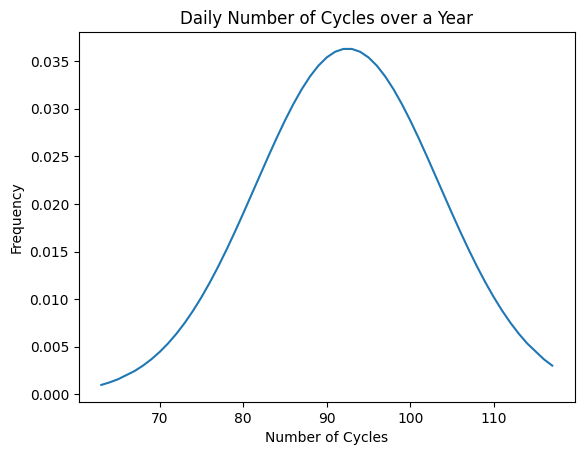

In [121]:
mean = statistics.mean(np.sort(ciclos_menores))
sd = statistics.stdev(np.sort(ciclos_menores))
plt.plot(np.sort(ciclos_menores), norm.pdf(np.sort(ciclos_menores), mean, sd))
plt.title("Daily Number of Cycles over a Year")
plt.ylabel("Frequency")
plt.xlabel("Number of Cycles")
plt.show()


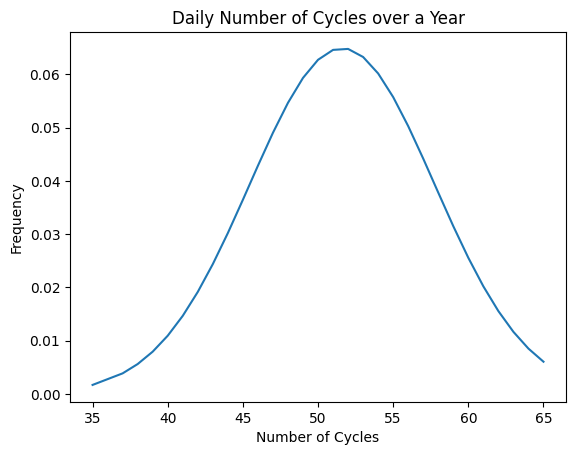

In [122]:
mean = statistics.mean(np.sort(ciclos))
sd = statistics.stdev(np.sort(ciclos))
plt.plot(np.sort(ciclos), norm.pdf(np.sort(ciclos), mean, sd))
plt.title("Daily Number of Cycles over a Year")
plt.ylabel("Frequency")
plt.xlabel("Number of Cycles")
plt.show()


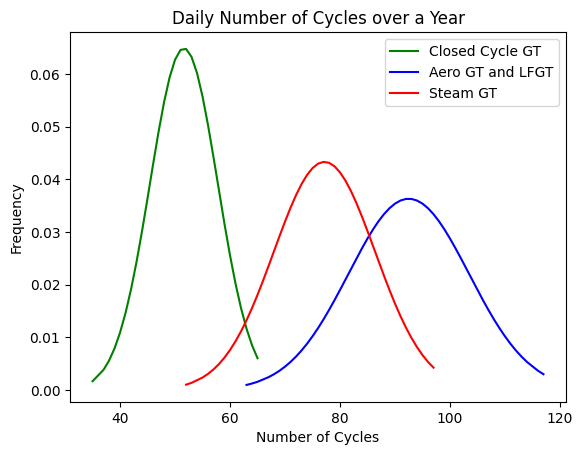

In [123]:
mean = statistics.mean(np.sort(ciclos))
sd = statistics.stdev(np.sort(ciclos))
plt.plot(np.sort(ciclos), norm.pdf(np.sort(ciclos), mean, sd),
         color="g", label="Closed Cycle GT")

mean = statistics.mean(np.sort(ciclos_menores))
sd = statistics.stdev(np.sort(ciclos_menores))
plt.plot(np.sort(ciclos_menores), norm.pdf(np.sort(ciclos_menores),
         mean, sd), color="b", label="Aero GT and LFGT")

mean = statistics.mean(np.sort(ciclos_steam))
sd = statistics.stdev(np.sort(ciclos_steam))
plt.plot(np.sort(ciclos_steam), norm.pdf(
    np.sort(ciclos_steam), mean, sd), color="r", label="Steam GT")

plt.legend(loc="upper right")
plt.title("Daily Number of Cycles over a Year")
plt.ylabel("Frequency")
plt.xlabel("Number of Cycles")
plt.show()


In [124]:
media_day_cycles = np.ceil(np.average(ciclos))
print("numero médio de ciclos em um dia =", media_day_cycles)


numero médio de ciclos em um dia = 52.0


In [125]:
media_day_cycles_menores = np.ceil(np.average(ciclos_menores))
print("numero médio de ciclos em um dia =", media_day_cycles_menores)


numero médio de ciclos em um dia = 93.0


## subseção - impacto no custo

In [126]:
print(df2)


                     1          2          3           4               5  \
0                  NaN       CCGT   Gas Aero   Gas Steam  Large Frame GT   
1           cycle cost         55         24          58             126   
2          other costs          0        1.9        3.99            0.95   
3            fuel cost        0.2       1.53        6.99            0.19   
4      fuel energy(NG)      47130      47130       47130           47130   
5       fuel price(NG)      0.213      0.213       0.213           0.213   
6     energy price(NG)   0.000005   0.000005    0.000005        0.000005   
7     energy price(NG)   4.768235   4.768235    4.768235        4.768235   
8            Total(NG)  55.953647  33.195399    95.31996      127.855965   
9       fuel energy(H)     119986     119986      119986          119986   
10       fuel price(H)       2.69       2.69        2.69            2.69   
11     energy price(H)   0.000022   0.000022    0.000022        0.000022   
12     energ

In [127]:
Variable_cost_CCGT = df2.loc[15, 2]
Variable_cost_AGT = df2.loc[15, 3]
Variable_cost_SGT = df2.loc[15, 4]
Variable_cost_LFGT = df2.loc[15, 5]


Total cost of a CCGT cycle on NG: 1309315.337928
Total cost of a CCGT cycle on H: 1397698.824366


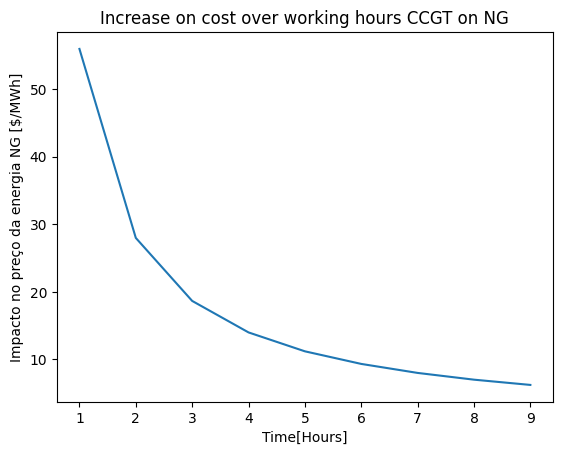

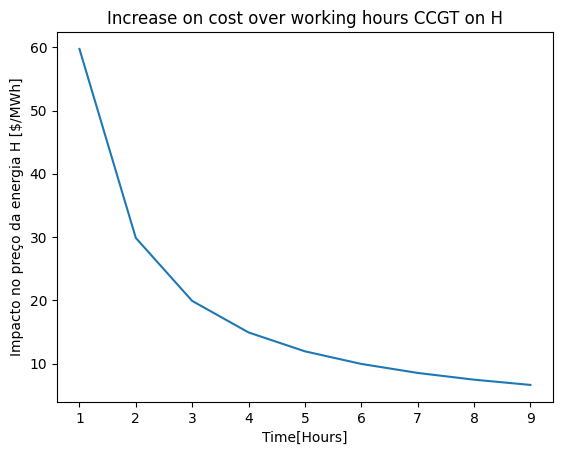

In [128]:
total_natural_gas_CCGT = df2.loc[8, 2] * media_day_cycles * potencia_termo
print("Total cost of a CCGT cycle on NG:", total_natural_gas_CCGT)

total_hydrogen_gas_CCGT = df2.loc[13, 2] * media_day_cycles * potencia_termo
print("Total cost of a CCGT cycle on H:", total_hydrogen_gas_CCGT)

impact_over_time_ng_CCGT = []
for i in range(1, 10):
    impact_over_time_ng_CCGT.append(
        ((df2.loc[8, 2] * potencia_termo) / (potencia_termo*i)))

impact_over_time_h_CCGT = []
for i in range(1, 10):
    impact_over_time_h_CCGT.append(
        ((df2.loc[13, 2] * potencia_termo) / (potencia_termo*i)))

plt.plot(range(1, 10), impact_over_time_ng_CCGT)
plt.title("Increase on cost over working hours CCGT on NG")
plt.xlabel("Time[Hours]")
plt.ylabel("Impacto no preço da energia NG [$/MWh]")
plt.show()

plt.plot(range(1, 10), impact_over_time_h_CCGT)
plt.title("Increase on cost over working hours CCGT on H")
plt.xlabel("Time[Hours]")
plt.ylabel("Impacto no preço da energia H [$/MWh]")
plt.show()


Total cost of a Aero GT cycle on NG: 771793.0253549999
Total cost of a Aero GT cycle on H: 1443592.5062775


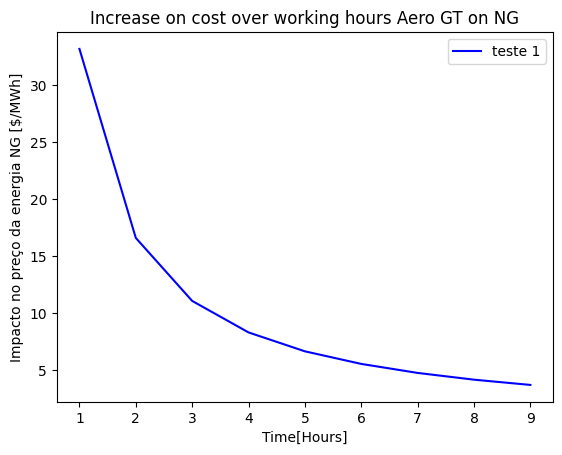

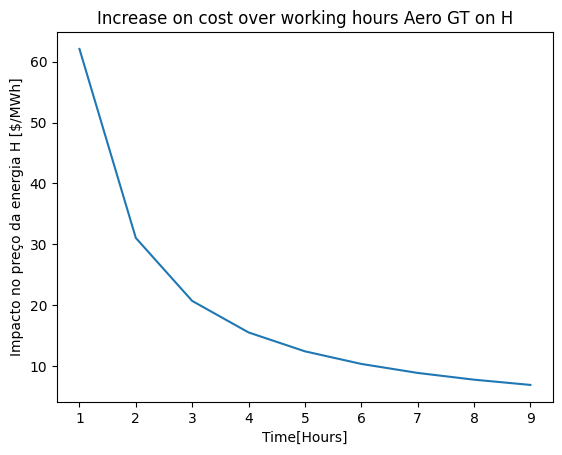

In [129]:
total_natural_gas_AGT = df2.loc[8, 3] * \
    media_day_cycles_menores * potencia_termo_menores
print("Total cost of a Aero GT cycle on NG:", total_natural_gas_AGT)

total_hydrogen_gas_AGT = df2.loc[13, 3] * \
    media_day_cycles_menores * potencia_termo_menores
print("Total cost of a Aero GT cycle on H:", total_hydrogen_gas_AGT)

impact_over_time_ng_AGT = []
for i in range(1, 10):
    impact_over_time_ng_AGT.append(
        ((df2.loc[8, 3] * potencia_termo_menores) / (potencia_termo_menores*i)))

impact_over_time_h_AGT = []
for i in range(1, 10):
    impact_over_time_h_AGT.append(
        ((df2.loc[13, 3] * potencia_termo_menores) / (potencia_termo_menores*i)))

plt.plot(range(1, 10), impact_over_time_ng_AGT, color="b", label="teste 1")
plt.legend(loc="upper right")

plt.title("Increase on cost over working hours Aero GT on NG")
plt.xlabel("Time[Hours]")
plt.ylabel("Impacto no preço da energia NG [$/MWh]")
plt.show()

plt.plot(range(1, 10), impact_over_time_h_AGT)
plt.title("Increase on cost over working hours Aero GT on H")
plt.xlabel("Time[Hours]")
plt.ylabel("Impacto no preço da energia H [$/MWh]")
plt.show()


Total cost of a Steam GT cycle on NG: 2230487.060256
Total cost of a Steam GT cycle on H: 5319489.91158


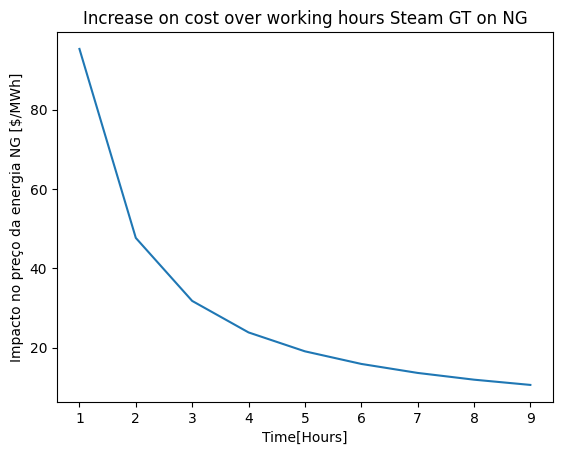

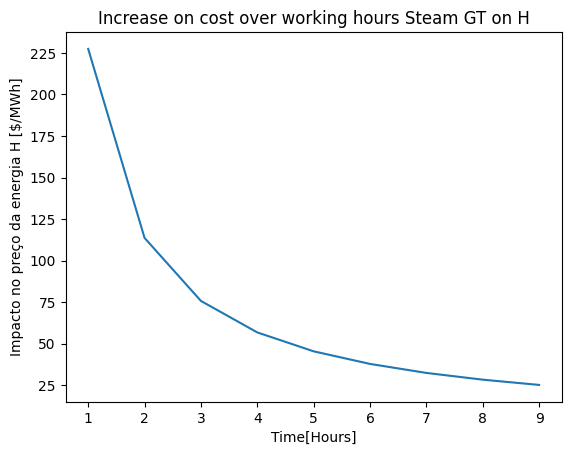

In [130]:
total_natural_gas_SGT = df2.loc[8, 4] * media_day_cycles * potencia_termo
print("Total cost of a Steam GT cycle on NG:", total_natural_gas_SGT)

total_hydrogen_gas_SGT = df2.loc[13, 4] * media_day_cycles * potencia_termo
print("Total cost of a Steam GT cycle on H:", total_hydrogen_gas_SGT)

impact_over_time_ng_SGT = []
for i in range(1, 10):
    impact_over_time_ng_SGT.append(
        ((df2.loc[8, 4] * potencia_termo) / (potencia_termo * i)))

impact_over_time_h_SGT = []
for i in range(1, 10):
    impact_over_time_h_SGT.append(
        ((df2.loc[13, 4] * potencia_termo) / (potencia_termo * i)))

plt.plot(range(1, 10), impact_over_time_ng_SGT)
plt.title("Increase on cost over working hours Steam GT on NG")
plt.xlabel("Time[Hours]")
plt.ylabel("Impacto no preço da energia NG [$/MWh]")
plt.show()

plt.plot(range(1, 10), impact_over_time_h_SGT)
plt.title("Increase on cost over working hours Steam GT on H")
plt.xlabel("Time[Hours]")
plt.ylabel("Impacto no preço da energia H [$/MWh]")
plt.show()


Total cost of a Large frame GT cycle on NG: 2972651.1769499998
Total cost of a Large frame GT cycle on H: 1708774.3790000002


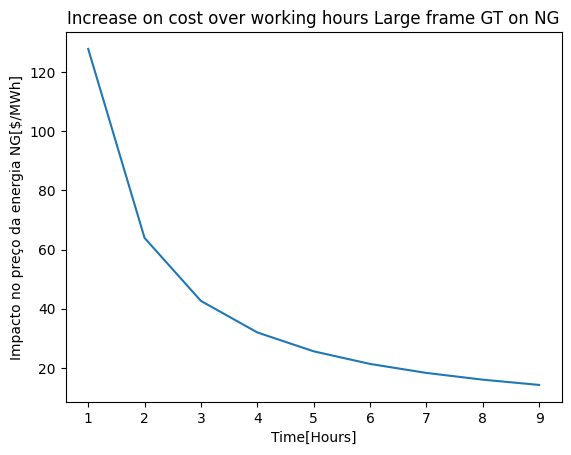

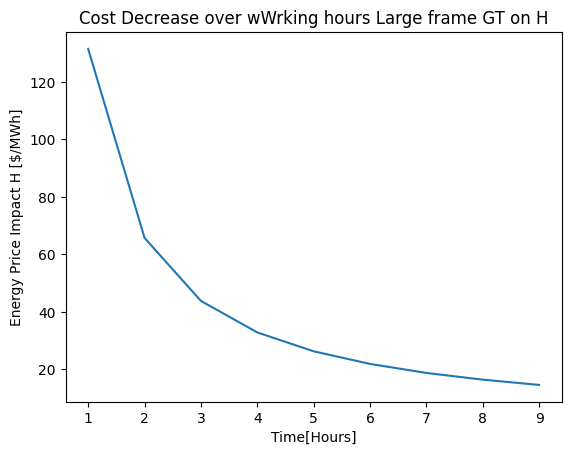

In [131]:
total_natural_gas_LFGT = df2.loc[8, 5] * \
    media_day_cycles_menores * potencia_termo_menores
print("Total cost of a Large frame GT cycle on NG:", total_natural_gas_LFGT)

total_hydrogen_gas_LFGT = df2.loc[13, 5] * \
    media_day_cycles * potencia_termo_menores
print("Total cost of a Large frame GT cycle on H:", total_hydrogen_gas_LFGT)

impact_over_time_ng_LFGT = []
for i in range(1, 10):
    impact_over_time_ng_LFGT.append(
        ((df2.loc[8, 5] * potencia_termo_menores)/(potencia_termo_menores*i)))

impact_over_time_h_LFGT = []
for i in range(1, 10):
    impact_over_time_h_LFGT.append(
        ((df2.loc[13, 5] * potencia_termo_menores)/(potencia_termo_menores*i)))

plt.plot(range(1, 10), impact_over_time_ng_LFGT)
plt.title("Increase on cost over working hours Large frame GT on NG")
plt.xlabel("Time[Hours]")
plt.ylabel("Impacto no preço da energia NG[$/MWh]")
plt.show()

plt.plot(range(1, 10), impact_over_time_h_LFGT)
plt.title("Cost Decrease over wWrking hours Large frame GT on H")
plt.xlabel("Time[Hours]")
plt.ylabel("Energy Price Impact H [$/MWh]")
plt.show()


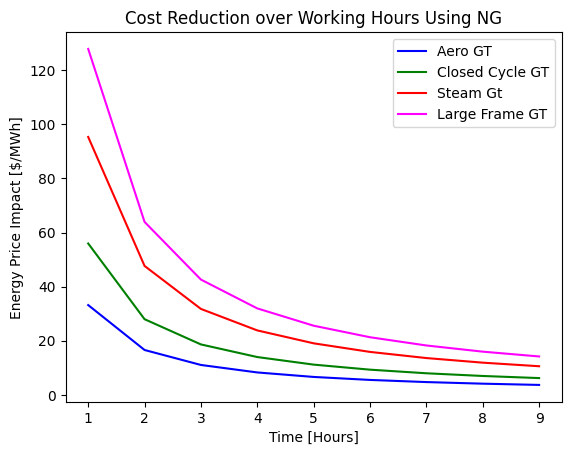

In [132]:
plt.plot(range(1, 10), impact_over_time_ng_AGT, color="b", label="Aero GT")
plt.plot(range(1, 10), impact_over_time_ng_CCGT,
         color="g", label="Closed Cycle GT")

plt.plot(range(1, 10), impact_over_time_ng_SGT, color="r", label="Steam Gt")
plt.plot(range(1, 10), impact_over_time_ng_LFGT,
         color="magenta", label="Large Frame GT")

plt.legend(loc="upper right")

plt.title("Cost Reduction over Working Hours Using NG")
plt.xlabel("Time [Hours]")
plt.ylabel("Energy Price Impact [$/MWh]")
plt.show()


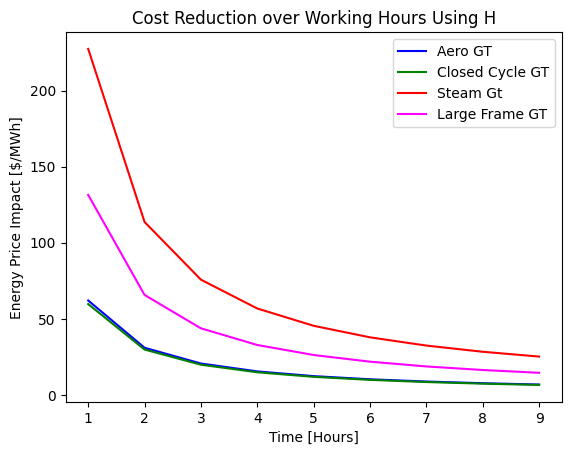

In [133]:
plt.plot(range(1, 10), impact_over_time_h_AGT, color="b", label="Aero GT")
plt.plot(range(1, 10), impact_over_time_h_CCGT,
         color="g", label="Closed Cycle GT")

plt.plot(range(1, 10), impact_over_time_h_SGT, color="r", label="Steam Gt")
plt.plot(range(1, 10), impact_over_time_h_LFGT,
         color="magenta", label="Large Frame GT")

plt.legend(loc="upper right")

plt.title("Cost Reduction over Working Hours Using H")
plt.xlabel("Time [Hours]")
plt.ylabel("Energy Price Impact [$/MWh]")
plt.show()


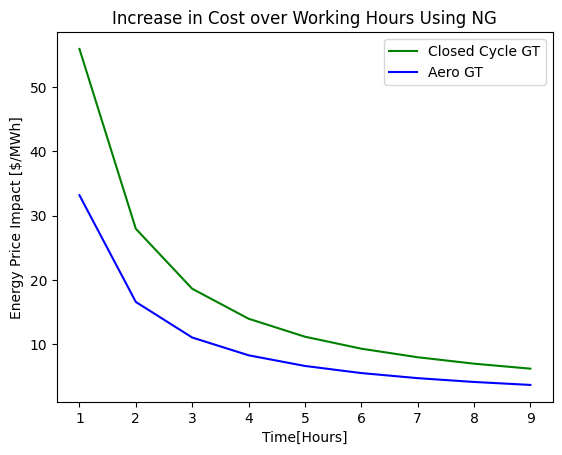

In [134]:
plt.plot(range(1, 10), impact_over_time_ng_CCGT,
         color="g", label="Closed Cycle GT")

plt.plot(range(1, 10), impact_over_time_ng_AGT, color="b", label="Aero GT")

plt.legend(loc="upper right")

plt.title("Increase in Cost over Working Hours Using NG")
plt.xlabel("Time[Hours]")
plt.ylabel("Energy Price Impact [$/MWh]")
plt.show()


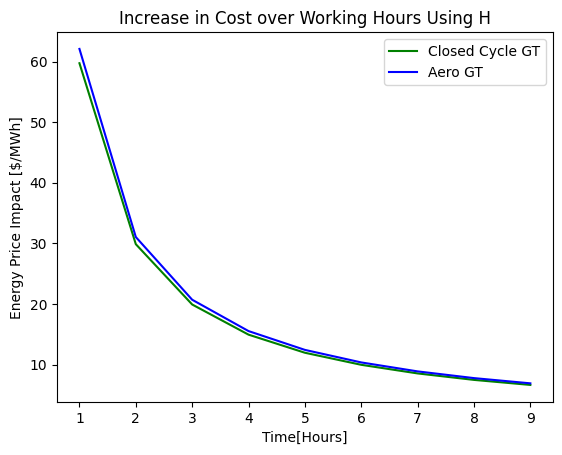

In [135]:
plt.plot(range(1, 10), impact_over_time_h_CCGT,
         color="g", label="Closed Cycle GT")

plt.plot(range(1, 10), impact_over_time_h_AGT, color="b", label="Aero GT")

plt.legend(loc="upper right")

plt.title("Increase in Cost over Working Hours Using H")
plt.xlabel("Time[Hours]")
plt.ylabel("Energy Price Impact [$/MWh]")
plt.show()


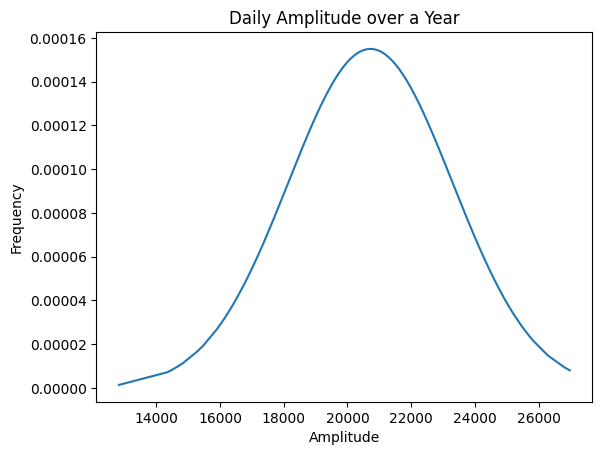

In [136]:
mean = statistics.mean(np.sort(amplitudes))
sd = statistics.stdev(np.sort(amplitudes))
plt.plot(np.sort(amplitudes), norm.pdf(np.sort(amplitudes), mean, sd))
plt.title("Daily Amplitude over a Year")
plt.ylabel("Frequency")
plt.xlabel("Amplitude")
plt.show()


In [137]:
custo_mw_flexivel_ccgt_NG = ((total_natural_gas_CCGT * media_day_cycles) /
                             MWH_flexivel) + (Variable_cost_CCGT * MWH_flexivel)

print("Custo CCGT (NG) do MW Flexível = ", custo_mw_flexivel_ccgt_NG)

custo_mw_flexivel_ccgt_H = ((total_hydrogen_gas_CCGT * media_day_cycles) /
                            MWH_flexivel) + (Variable_cost_CCGT * MWH_flexivel)

print("Custo CCGT (H) do MW Flexível = ", custo_mw_flexivel_ccgt_H)

custo_mw_flexivel_agt_NG = ((total_natural_gas_AGT * media_day_cycles) /
                            MWH_flexivel) + (Variable_cost_AGT * MWH_flexivel)

print("Custo Aero GT (NG) do MW Flexível = ", custo_mw_flexivel_agt_NG)

custo_mw_flexivel_agt_H = ((total_hydrogen_gas_AGT * media_day_cycles) /
                           MWH_flexivel) + (Variable_cost_AGT * MWH_flexivel)

print("Custo Aero GT (H) do MW Flexível = ", custo_mw_flexivel_agt_H)

custo_mw_flexivel_sgt_NG = ((total_natural_gas_SGT * media_day_cycles) /
                            MWH_flexivel) + (Variable_cost_SGT * MWH_flexivel)

print("Custo Steam GT (NG) do MW Flexível = ", custo_mw_flexivel_sgt_NG)

custo_mw_flexivel_sgt_H = ((total_hydrogen_gas_SGT * media_day_cycles) /
                           MWH_flexivel) + (Variable_cost_SGT * MWH_flexivel)

print("Custo Steam GT (H) do MW Flexível = ", custo_mw_flexivel_sgt_H)

custo_mw_flexivel_lfgt_NG = ((total_natural_gas_LFGT * media_day_cycles) /
                             MWH_flexivel) + (Variable_cost_LFGT * MWH_flexivel)

print("Custo LFGT (NG) do MW Flexível = ", custo_mw_flexivel_lfgt_NG)

custo_mw_flexivel_lfgt_H = ((total_hydrogen_gas_LFGT * media_day_cycles) /
                            MWH_flexivel) + (Variable_cost_LFGT * MWH_flexivel)

print("Custo LFGT (H) do MW Flexível = ", custo_mw_flexivel_lfgt_H)


Custo CCGT (NG) do MW Flexível =  208252.15621160367
Custo CCGT (H) do MW Flexível =  208274.70287304232
Custo Aero GT (NG) do MW Flexível =  134732.15781629842
Custo Aero GT (H) do MW Flexível =  134903.53412268165
Custo Steam GT (NG) do MW Flexível =  188103.0151821983
Custo Steam GT (H) do MW Flexível =  188891.02099955958
Custo LFGT (NG) do MW Flexível =  116947.87851704136
Custo LFGT (H) do MW Flexível =  116625.46305899616


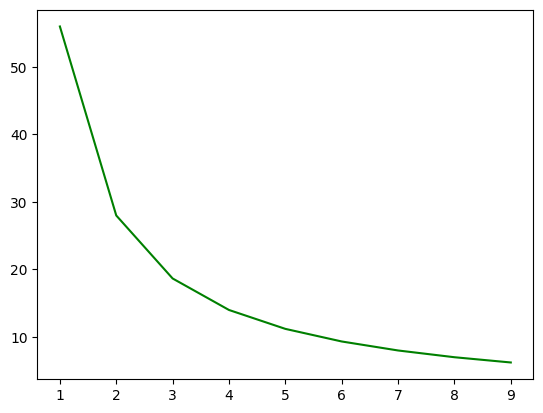

In [138]:
final_cost_time = []
for i in range(10):
    if i < len(impact_over_time_ng_CCGT):  # Tive que mudar para rodar # TODO mudar de volta
        final_cost = impact_over_time_ng_CCGT[i] + Variable_cost_CCGT
        final_cost_time.append(final_cost)


plt.plot(range(1, 10), impact_over_time_ng_CCGT,
         color="g", label="Closed Cycle GT")


#notas

TEM QUE ADICIONAR NOISE NO DATASET DE VARIAÇÃO HORÁRIA (base the noise in energias não despachaveis)